# Relatório de Análise VII

## Criando Agrupamentos

In [89]:
import pandas as pd

In [90]:
dados = pd.read_csv("dados/aluguel_residencial.csv", sep=";")

In [91]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [92]:
dados["Valor"].mean()

5029.378091872792

In [93]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [94]:
dados["Bairro"].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
12           Botafogo
16             Tijuca
20             Leblon
21            Ipanema
80           Flamengo
Name: Bairro, dtype: object

In [95]:
grupo_bairro = dados.groupby("Bairro")

In [96]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [97]:
grupo_bairro.groups

{'Barra da Tijuca': [5, 15, 17, 23, 32, 34, 37, 44, 45, 62, 63, 66, 70, 76, 81, 95, 109, 112, 114, 119, 132, 134, 138, 154, 157, 159, 169, 170, 177, 190, 193, 212, 219, 226, 229, 238, 239, 242, 245, 250, 265, 271, 281, 283, 298, 299, 300, 302, 309, 315, 318, 332, 342, 343, 352, 367, 373, 375, 381, 387, 394, 396, 407, 419, 439, 440, 442, 443, 446, 456, 459, 470, 471, 473, 481, 484, 492, 502, 508, 511, 519, 535, 546, 547, 548, 549, 552, 556, 561, 563, 564, 565, 581, 595, 598, 599, 601, 605, 607, 612, ...], 'Botafogo': [12, 25, 50, 89, 90, 113, 121, 129, 136, 201, 205, 230, 341, 369, 422, 423, 458, 506, 532, 534, 554, 604, 660, 696, 730, 768, 777, 798, 836, 841, 875, 933, 942, 946, 1024, 1063, 1101, 1113, 1133, 1139, 1150, 1163, 1188, 1225, 1229, 1230, 1248, 1275, 1308, 1321, 1330, 1343, 1374, 1411, 1445, 1450, 1487, 1550, 1562, 1612, 1664, 1668, 1690, 1706, 1727, 1736, 1778, 1779, 1827, 1855, 1864, 1867, 1894, 1964, 1974, 2000, 2015, 2024, 2032, 2073, 2110, 2113, 2126, 2128, 2129, 2133, 

In [98]:
for bairro, dados in grupo_bairro:
    print(type(dados))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [99]:
for bairro, data in grupo_bairro:
    print(f"{bairro} -> {data.Valor.mean()}")

Barra da Tijuca -> 6962.353252647504
Botafogo -> 8522.794535519126
Copacabana -> 4095.454746136865
Flamengo -> 4103.390820584144
Ipanema -> 9170.718015665796
Leblon -> 8581.582450832073
Tijuca -> 2043.52


In [100]:
grupo_bairro[["Condominio", "Valor"]].mean().round(2)

,Condominio,Valor
Bairro,,
Barra da Tijuca,3537.38,6962.35
Botafogo,981.77,8522.79
Copacabana,1152.03,4095.45
Flamengo,1099.84,4103.39
Ipanema,2283.87,9170.72
Leblon,2091.95,8581.58
Tijuca,711.69,2043.52


In [101]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

In [102]:
alunos

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


In [103]:
sexo = alunos.groupby("Sexo")

In [104]:
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))

In [105]:
sexo.columns = ["Nota Média"]

In [106]:
sexo

,Nota Média
Sexo,
F,5.82
M,7.12


## Estatísticas Descritivas

In [107]:
grupo_bairro["Valor"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3966.0,6962.35,11740.05,800.0,2500.0,4400.0,8500.0,600000.0
Botafogo,915.0,8522.79,148669.42,700.0,2200.0,3000.0,4310.0,4500000.0
Copacabana,2718.0,4095.45,3572.63,100.0,2000.0,3000.0,4781.5,35000.0
Flamengo,719.0,4103.39,3828.55,800.0,1900.0,2900.0,4900.0,35000.0
Ipanema,1915.0,9170.72,7971.39,1200.0,4400.0,7000.0,10500.0,90000.0
Leblon,1322.0,8581.58,6877.75,100.0,4500.0,6800.0,10000.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [108]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'mean']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo', "mean": "Média"})

,Mínimo,Máximo,Média
Bairro,,,
Barra da Tijuca,800.0,600000.0,6962.353253
Botafogo,700.0,4500000.0,8522.794536
Copacabana,100.0,35000.0,4095.454746
Flamengo,800.0,35000.0,4103.390821
Ipanema,1200.0,90000.0,9170.718016
Leblon,100.0,100000.0,8581.582451
Tijuca,750.0,45000.0,2043.520000


In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("figure", figsize = (20, 10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

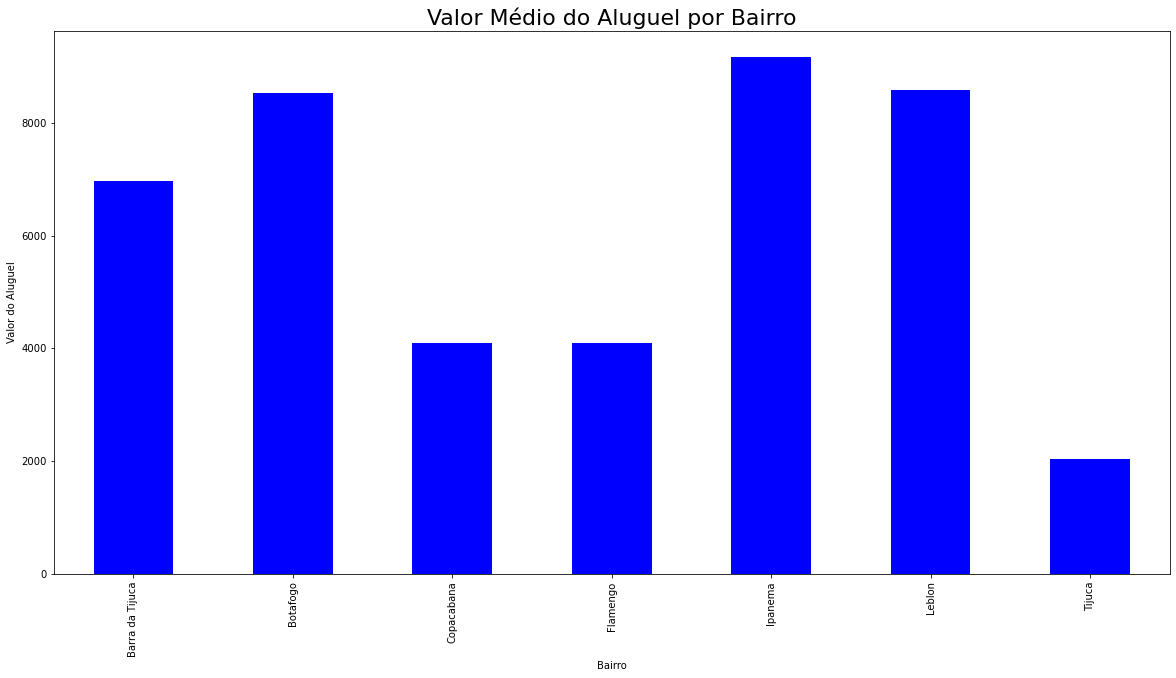

In [113]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

In [114]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [115]:
produtos = precos.groupby('Produto')
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0